In [1]:
import os
%matplotlib widget
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import numpy as np

In [ ]:
# Input/output options
args = WorkflowInputs(
    images=["./christa_GA/1740662437.301419_GA_christa.jpg"],
    names="image",
    result="example_results_oneimage_file.json",
    outdir=".",
    writeimg=False,
    debug="plot",
    sample_label="christa_0%_plant2_18"
    )

In [3]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 0.2
pcv.params.text_thickness = 20

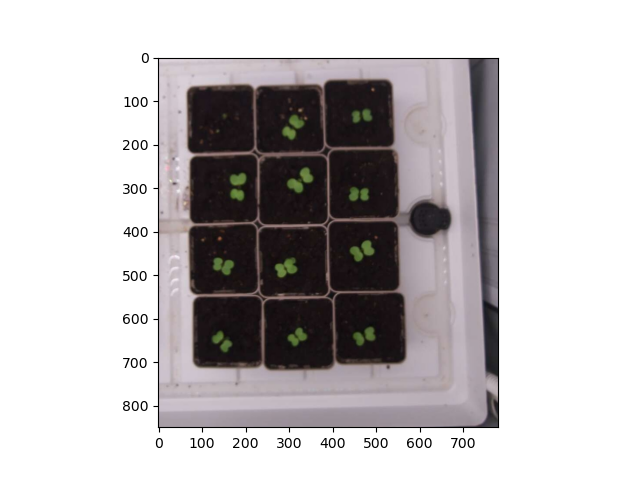

In [4]:
img, path, filename = pcv.readimage(filename=args.image)

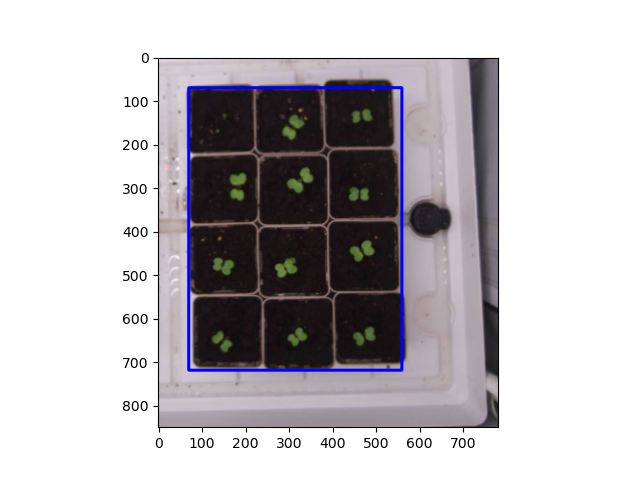

In [9]:
# crop image to get the interest region
crop_img = pcv.crop(img=img, x=70, y=70, h=650, w=490)

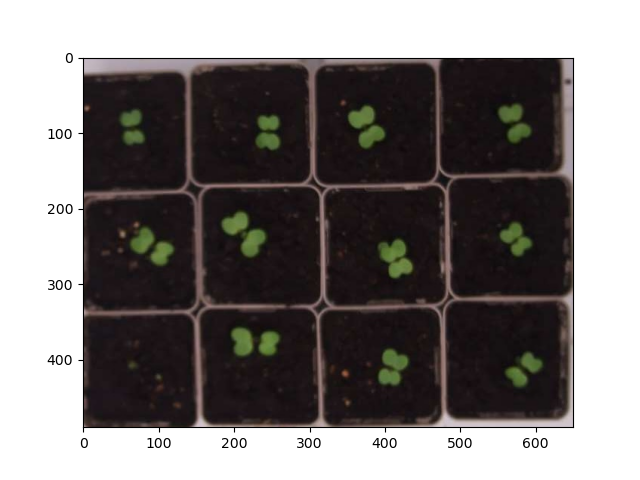

In [19]:
# # Rotate image
rotate_img = pcv.transform.rotate(crop_img, 90, False)

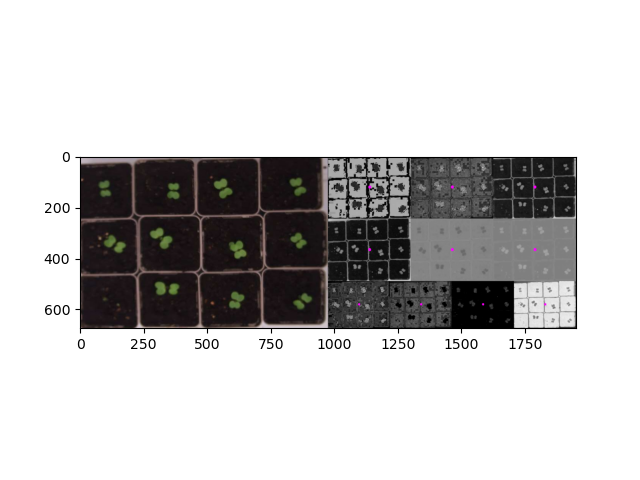

In [20]:
# visulaize the color spacing to check for the distnict feature of the plant
colorspace_img_right = pcv.visualize.colorspaces(rgb_img= rotate_img_right)

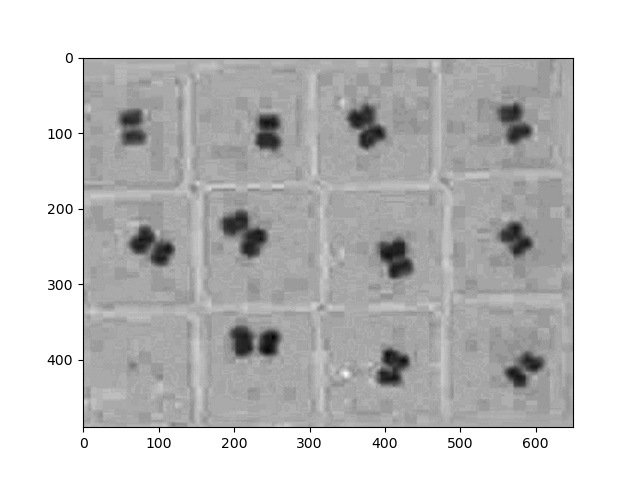

In [21]:
a_channel = pcv.rgb2gray_lab(rgb_img=rotate_img_right, channel="a")

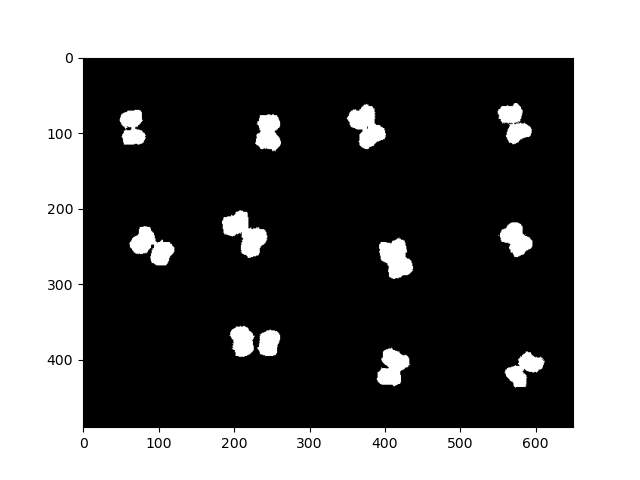

In [22]:
# binary threshold 
a_thresh = pcv.threshold.binary(gray_img=a_channel, threshold=120, object_type='dark')

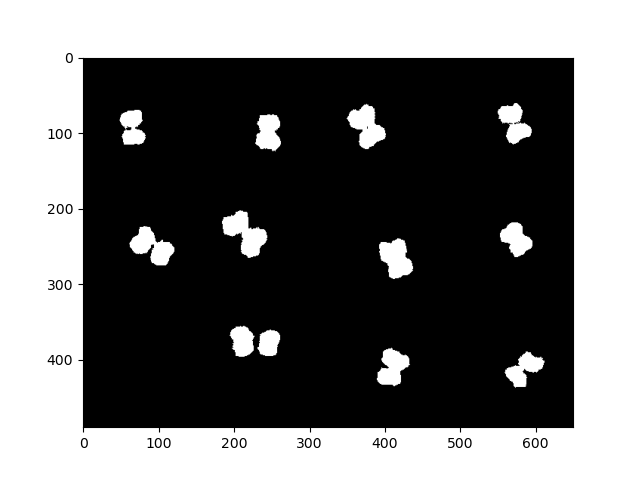

In [23]:
# Fill in small objects if the above threshold looks like there are "holes" in the leaves
a_fill_image = pcv.fill(bin_img=a_thresh, size=50)


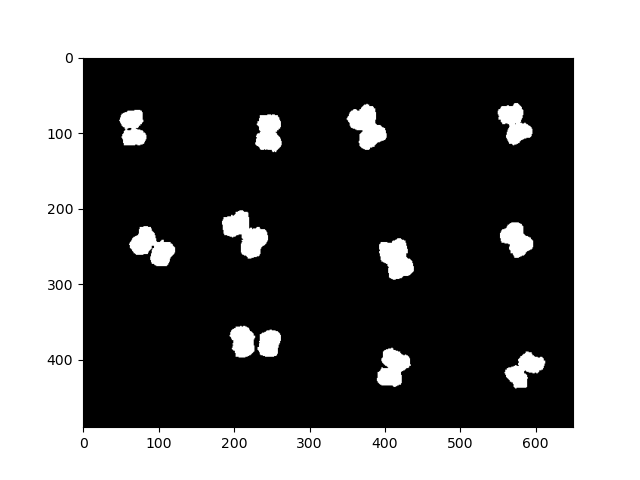

In [24]:
dilated_img = pcv.dilate(gray_img=a_fill_image, ksize=2, i=1)

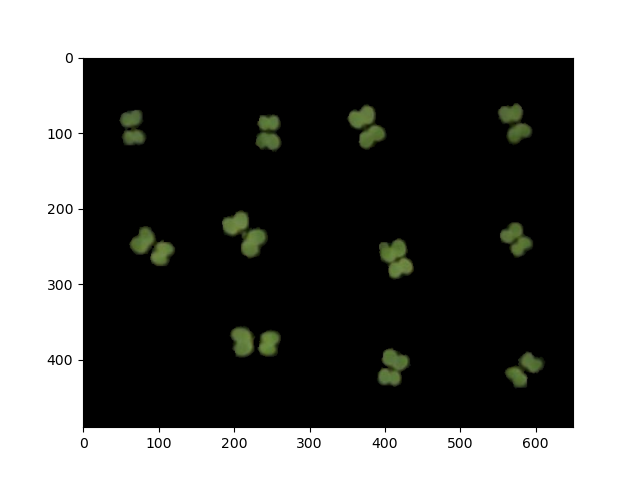

In [25]:
# Mask images
mask = pcv.apply_mask(img=rotate_img, mask=dilated_img, mask_color='black')

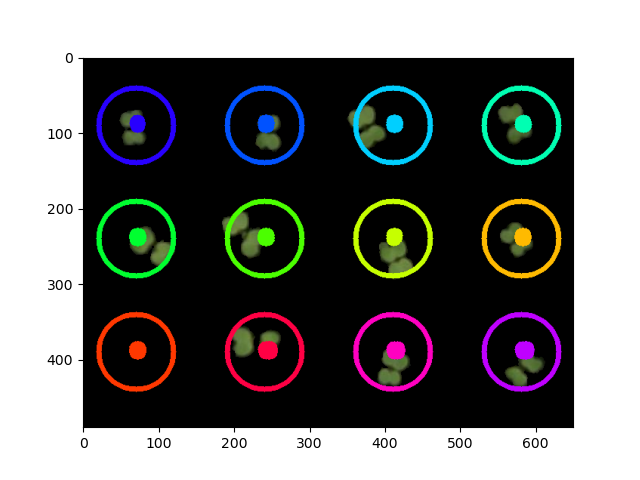

In [28]:
# Make a grid of ROIs
roi_objects =pcv.roi.multi(img=mask, coord=(70,90), radius=50, 
                                      spacing=(170, 150), nrows=3, ncols=4)

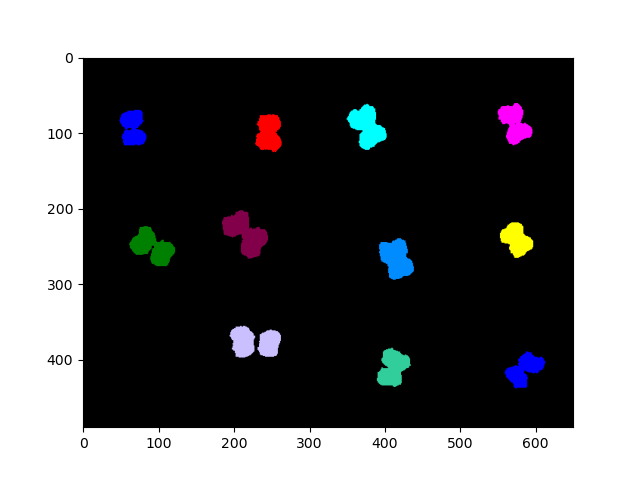

In [29]:
labeled_mask, num_plants = pcv.create_labels(mask=dilated_img, rois=roi_objects, roi_type="partial")

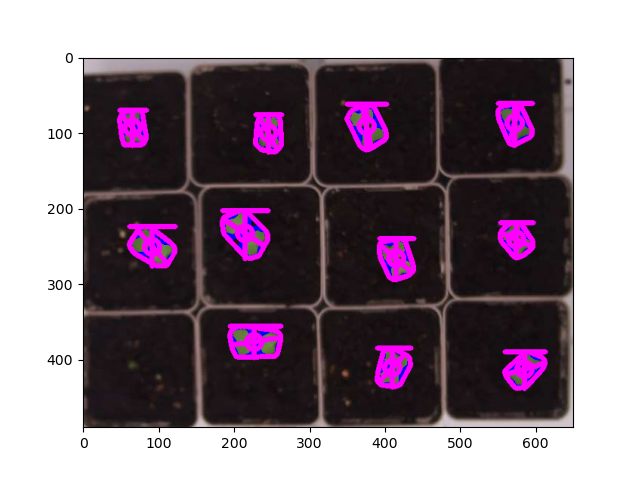

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[197, 185, 197],
        [197, 185, 197],
        [198, 186, 198],
        ...,
        [175, 163, 175],
        [175, 163, 175],
        [173, 163, 175]],

       [[197, 185, 197],
        [197, 185, 197],
        [198, 186, 198],
        ...,
        [175, 163, 175],
        [175, 163, 175],
        [175, 163, 175]],

       ...,

       [[135, 138, 153],
        [115, 118, 133],
        [ 93,  95, 113],
        ...,
        [205, 197, 207],
        [205, 197, 207],
        [205, 197, 207]],

       [[155, 155, 171],
        [135, 138, 153],
        [114, 116, 134],
        ...,
        [205, 197, 207],
        [205, 197, 207],
        [206, 197, 207]],

       [[168, 168, 184],
        [152, 152, 168],
        [134, 136, 154],
        ...,
        [205, 197, 207],
        [205, 197, 207],
        [205, 197, 207]]

In [30]:
pcv.analyze.size(img=rotate_img_right, labeled_mask=labeled_mask, n_labels=num_plants, label="plant")